In [2]:
import kagglehub
import os
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



path = kagglehub.dataset_download("infamouscoder/depression-reddit-cleaned")
print("Path to dataset files:", path)
print('Archivos: ', os.listdir(path=path))

df = pd.read_csv('../data_sets/depression_dataset_reddit_cleaned.csv')

Path to dataset files: /home/jordi/.cache/kagglehub/datasets/infamouscoder/depression-reddit-cleaned/versions/1
Archivos:  []


In [3]:
#df analysis
df['is_depression'] = df['is_depression'].replace({0:'neutral', 1: 'depression'})
len(df)
df.head(3)
filas, columns = df.shape
print(f'Cantidad de Filas {filas} -- Cantidad Columnas {columns}')
df.is_depression.unique() #Indicates probable depression boolean 1True 0False
df.isna().sum() #Indicates data is already clean

Cantidad de Filas 7731 -- Cantidad Columnas 2


clean_text       0
is_depression    0
dtype: int64

In [4]:
depression_texts = df[df['is_depression'] == 'depression']
no_depression_texts = df[df['is_depression'] == 'neutral']


print(depression_texts['clean_text'],'\n')
print('*'*100)
print('*'*100)
print('*'*100)
no_depression_texts['clean_text']

0       we understand that most people who reply immed...
1       welcome to r depression s check in post a plac...
2       anyone else instead of sleeping more when depr...
3       i ve kind of stuffed around a lot in my life d...
4       sleep is my greatest and most comforting escap...
                              ...                        
3826    thlolo march eh it s because i don t want stre...
3827    i hate it when i m having depression day and t...
3828                               educational depression
3829    dmt powder helping with depression amp anxiety...
3830    the great depression money armageddon ep0 http...
Name: clean_text, Length: 3831, dtype: object 

****************************************************************************************************
****************************************************************************************************
****************************************************************************************************


3831    switchfoot http twitpic com y zl awww that s a...
3832    is upset that he can t update his facebook by ...
3833    kenichan i dived many time for the ball manage...
3834         my whole body feel itchy and like it on fire
3835    nationwideclass no it s not behaving at all i ...
                              ...                        
7726                                         is that snow
7727                   moulin rouge mad me cry once again
7728    trying to shout but can t find people on the list
7729    ughh can t find my red sox hat got ta wear thi...
7730    slept wonderfully finally tried swatching for ...
Name: clean_text, Length: 3900, dtype: object

In [5]:
#de reddit a words
from nltk.corpus import stopwords
nltk.download('stopwords')
#Tokeniazar con nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
nltk.download('punkt') 
from nltk.stem import WordNetLemmatizer


def tweet_to_words (tweet): # tweet = comentario = será un coment de reddit
    #Acá se filtra el ruido semántico con una expresión regular
    letters_only= re.sub("[^a-zA-Z]", " ", tweet) # Expresión regular que filtra solo el texto nada de números o caracteres especiales
    
    #Acá hacemos tokenización con una forma básica
    words = letters_only.lower().split() # Se genera una LISTA de palabras en minúscula, es una tokenizacion sencilla
    #words = word_tokenize(letters_only.lower()) 

    #Eliminamos la stopwords
    stops = set(stopwords.words("english")) # Eliminamos palabras que no afecten el significado de la oración
    lemmatizer = WordNetLemmatizer()
    meaningful_words =[lemmatizer.lemmatize(w) for w in words if w not in stops]
    #meaningful_words = [w for w in words if not w in stops] # Guardamos las stopwords
    return(" ".join( meaningful_words ))
    
df_ =  df
df["clean_text"] = df['clean_text'].apply(lambda x: tweet_to_words(x))
df['clean_text']
#Se quitan las stopwords, como pronombres, comas, signos, etc



[nltk_data] Downloading package stopwords to /home/jordi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jordi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jordi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       understand people reply immediately op invitat...
1       welcome r depression check post place take mom...
2       anyone else instead sleeping depressed stay ni...
3       kind stuffed around lot life delaying inevitab...
4       sleep greatest comforting escape whenever wake...
                              ...                        
7726                                                 snow
7727                                 moulin rouge mad cry
7728                        trying shout find people list
7729    ughh find red sox hat got ta wear creepy nick ...
7730    slept wonderfully finally tried swatching new ...
Name: clean_text, Length: 7731, dtype: object

In [6]:
#Entrenamiento de Modelo
df['clean_text']
df['is_depression']
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
#Concetración de la data en listas

train_clean_message = []
for message in train['clean_text']:
    train_clean_message.append(message)

test_clean_message = []
for message in test['clean_text']:
    test_clean_message.append(message)

In [8]:
#Vectorizamos el dataset

#CountVectorizer va relacionado (en vectorización) a representación en BoW
#Podría no ser el más adecuado para un chatbot con redes neuronales, modelos como TF-IDF dan peso a las palabras
#O también Word Embeddings para capturar un significado profundo
#Posiblemente el mejor sea vectorizar con modelo como Word Embeddings
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

v = TfidfVectorizer()

train_features = v.fit_transform(train_clean_message)
test_features = v.transform(test_clean_message)


Accuracy of DecisionTreeClassifieris 0.9153199741435035
              precision    recall  f1-score   support

  depression       0.89      0.93      0.91       733
     neutral       0.94      0.90      0.92       814

    accuracy                           0.92      1547
   macro avg       0.92      0.92      0.92      1547
weighted avg       0.92      0.92      0.92      1547



<Figure size 640x480 with 0 Axes>

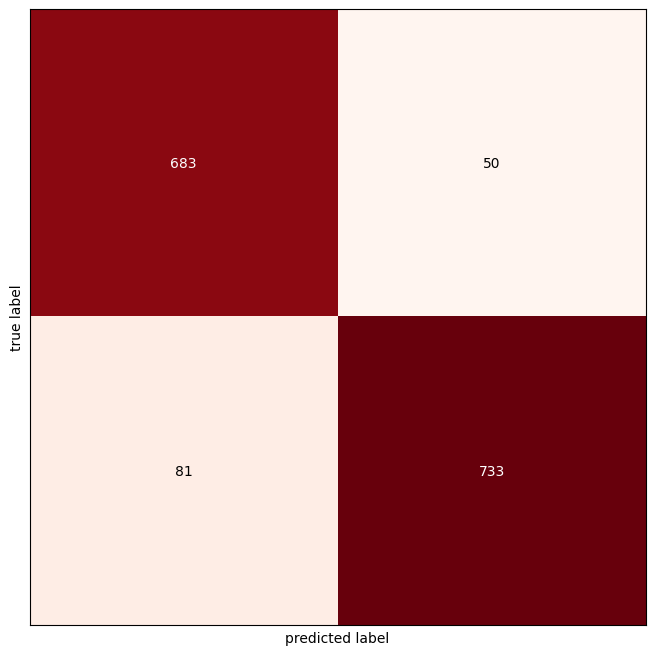

Accuracy of RandomForestClassifieris 0.9476405946994182
              precision    recall  f1-score   support

  depression       0.90      0.99      0.94       695
     neutral       0.99      0.91      0.95       852

    accuracy                           0.95      1547
   macro avg       0.95      0.95      0.95      1547
weighted avg       0.95      0.95      0.95      1547



<Figure size 640x480 with 0 Axes>

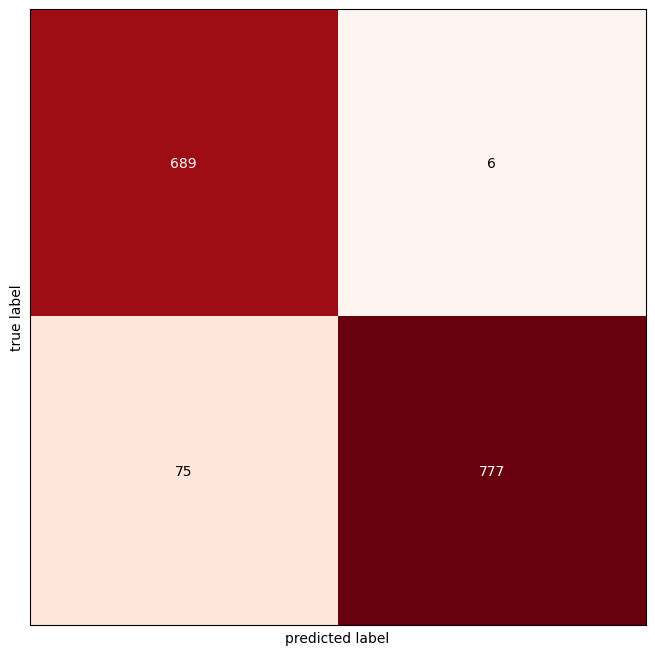

Accuracy of MultinomialNBis 0.8073691014867486
              precision    recall  f1-score   support

  depression       0.99      0.72      0.84      1050
     neutral       0.63      0.99      0.77       497

    accuracy                           0.81      1547
   macro avg       0.81      0.85      0.80      1547
weighted avg       0.87      0.81      0.81      1547



<Figure size 640x480 with 0 Axes>

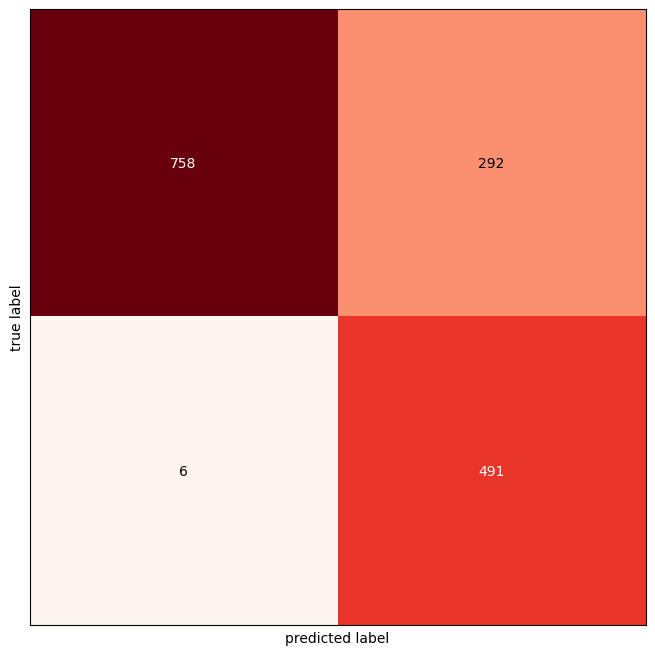

Accuracy of SVCis 0.9566903684550744
              precision    recall  f1-score   support

  depression       0.95      0.97      0.96       747
     neutral       0.97      0.95      0.96       800

    accuracy                           0.96      1547
   macro avg       0.96      0.96      0.96      1547
weighted avg       0.96      0.96      0.96      1547



<Figure size 640x480 with 0 Axes>

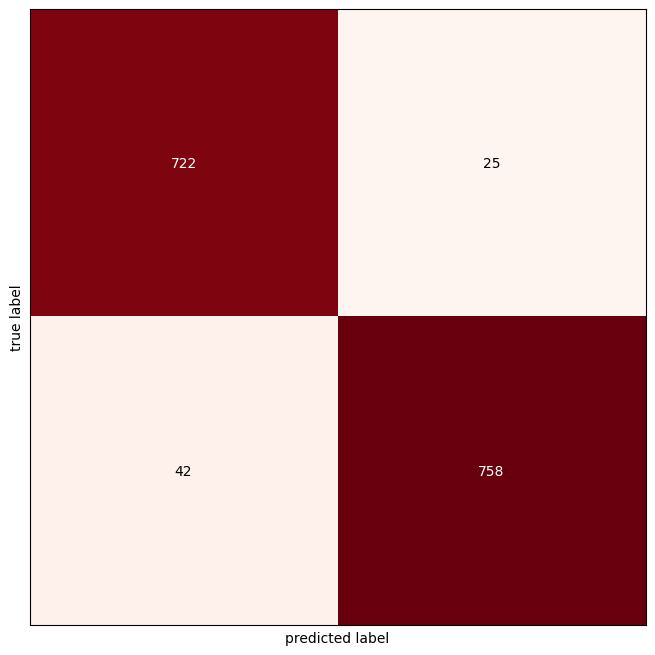

In [9]:
#Acá sería de elegir el modelo, por el momento lo haré con dos básicos
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

modelo_1, modelo_2 = DecisionTreeClassifier(), RandomForestClassifier(n_estimators=200)
modelo_3, modelo_4 = MultinomialNB(), SVC(kernel='linear')
Classifiers = [
    modelo_1,
    modelo_2,
    modelo_3,
    modelo_4

]

dense_features = train_features.toarray()
dense_test = test_features.toarray()

Accuracy = []
Model = []


for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features, train['is_depression'])
        pred = fit.predict(test_features)
    except:
        fit= classifier.fit(dense_features, train['is_depression'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred, test['is_depression'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print (classification_report (pred, test['is_depression']))
    cm = confusion_matrix(pred, test['is_depression'])
    plt.figure()
    plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
    plt.show()

    #import joblib
    #joblib.dump(modelo_1, 'modeloTreeClassifier.pkl')
    #joblib.dump(modelo_2, 'modeloRandomForest.pkl')

  
 

In [10]:
#Prueba básica del chatbot


mensaje = input('Hola qué tal estás?')


mensaje_procesado = tweet_to_words(mensaje)
t_features = v.transform([mensaje_procesado])  
prediccion = modelo_1.predict(t_features)

data_prueba =["I feel empty and like I have no purpose.",
              "Today is a good day",
"Nothing seems to matter anymore, and I can't find the energy to do anything.",
"I don't want to get out of bed most days, i don´t like it,my life doesn´t have sense, i hate it",
"It’s hard to find joy in anything anymore.",

"I feel really sad for no reason.",
"I don't want to talk to anyone or do anything.",
"Everything feels overwhelming, even the simplest tasks.",
"I can't stop thinking about how hopeless everything feels.",
"I feel like I'm stuck in a dark place, and I can't escape.",
"I don't see the point in anything anymore.",
"I feel like I am a burden to the people around me.",
"I just want to sleep and forget everything.",
"I’m tired all the time, even after sleeping.",
"I don’t care about things I used to enjoy.",
"I feel disconnected from everything and everyone.",
"It’s hard to concentrate or get excited about anything.",
"I don’t see a future for myself.",
"Everything I do feels like it’s not enough.",
"Sometimes I feel like I don’t belong anywhere.",
"I keep wondering if things will ever get better.",
"I feel like I’m trapped in my own thoughts.",      
"I just want to be left alone.",
"It feels like there's a weight on my chest that I can’t shake off.",
"I can’t find the motivation to take care of myself.",
"I don feel good,",
"i like this day",
"i tried to help his family abandoned him so it wa really hard to change his perspective im addict too gambling addiction but i will do better i hope sorry just a rant i found about it yesterday his life situation forced him to live in a mental hospital for last year and at the beginning of march he wanted to go to the germany to work a escort march he mentioned that he leaf tomorrow march i texted are you alive yesterday by googling him i found a necrology of him he killed himself march he texted many time to me about suicide thought im so sad,1to me it seems like an empty meaningless phrase people use like cool but it s not going to help the fact that i m broke can t get out of bed some day and struggling through live now,",
"let me tell you that my life hasn´t been the best lately, i don´t like to be like that, i wake up and i don´t feel nothing"]

data_p = [tweet_to_words(tweet) for tweet in data_prueba]
t_features = v.transform(data_p)  

prediccion = modelo_1.predict(t_features)
pred = modelo_2.predict(t_features)
pred2 = modelo_3.predict(t_features)
pred3 = modelo_4.predict(t_features)

# Mostrar las predicciones
for i,mes in enumerate(data_p):
    print(f"Predicción: {prediccion[i]} {i}")
    #print(f"Predicción: {pred[i]}")
    #print(f"Predicción: {pred2[i]}")
    #print(f"Predicción: {pred3[i]}")

 #El primer modelo es mucho más cercano, el otro sufre de sobreajuste


#Híbrido-- 


Predicción: depression 0
Predicción: neutral 1
Predicción: depression 2
Predicción: neutral 3
Predicción: depression 4
Predicción: depression 5
Predicción: depression 6
Predicción: depression 7
Predicción: neutral 8
Predicción: depression 9
Predicción: depression 10
Predicción: depression 11
Predicción: depression 12
Predicción: neutral 13
Predicción: depression 14
Predicción: neutral 15
Predicción: neutral 16
Predicción: neutral 17
Predicción: depression 18
Predicción: depression 19
Predicción: depression 20
Predicción: depression 21
Predicción: neutral 22
Predicción: depression 23
Predicción: depression 24
Predicción: neutral 25
Predicción: neutral 26
Predicción: depression 27
Predicción: depression 28


In [11]:
#Procesamiento de Data Completo